In [1]:
import numpy as np
import pandas as pd

# Analysis of the tips dataset

In [2]:
tips = pd.read_csv('Database/data/tips.csv')

In [3]:
tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [5]:
tips.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Study the relationship between tips and total bill amount
在tips后面插入一列，计算小费占总金额的百分比

In [7]:
tips.insert(2, 'tips_percent', tips.tip/tips.total_bill)

In [8]:
tips.head()

,total_bill,tip,tips_percent,sex,smoker,day,time,size
0,16.99,1.01,0.059447,Female,No,Sun,Dinner,2
1,10.34,1.66,0.160542,Male,No,Sun,Dinner,3
2,21.01,3.50,0.166587,Male,No,Sun,Dinner,3
3,23.68,3.31,0.139780,Male,No,Sun,Dinner,2
4,24.59,3.61,0.146808,Female,No,Sun,Dinner,4


按某列的前N名做倒序排列

In [10]:
# 前3名
tips.sort_values(by = 'tips_percent', ascending = False).head(3)

,total_bill,tip,tips_percent,sex,smoker,day,time,size
172,7.25,5.15,0.710345,Male,Yes,Sun,Dinner,2
178,9.60,4.00,0.416667,Female,Yes,Sun,Dinner,2
67,3.07,1.00,0.325733,Female,Yes,Sat,Dinner,1


In [14]:
#定义一个函数 默认按照小费百分比前三做倒序排列
def top(df, by = 'tips_percent', n = 3):
    return df.sort_values(by = by, ascending = False).head(n)

In [15]:
top(tips)

,total_bill,tip,tips_percent,sex,smoker,day,time,size
172,7.25,5.15,0.710345,Male,Yes,Sun,Dinner,2
178,9.60,4.00,0.416667,Female,Yes,Sun,Dinner,2
67,3.07,1.00,0.325733,Female,Yes,Sat,Dinner,1


按照是否吸烟分组，观察小费慷慨度降序前5名

In [16]:
tips.groupby('smoker')

In [18]:
top(tips.groupby('smoker'))

AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

报错原因：对df做了groupby，该对象没有sort_values方法，因此会报错  
解决方法：借助apply实现

In [20]:
?pd.DataFrame.apply

Signature:
pd.DataFrame.apply(
    self,
    func: 'AggFuncType',
    axis: 'Axis' = 0,
    raw: 'bool' = False,
    result_type: "Literal['expand', 'reduce', 'broadcast'] | None" = None,
    args=(),
    by_row: "Literal[False, 'compat']" = 'compat',
    engine: "Literal['python', 'numba']" = 'python',
    engine_kwargs: 'dict[str, bool] | None' = None,
    **kwargs,
)
Docstring:
Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is
either the DataFrame's index (``axis=0``) or the DataFrame's columns
(``axis=1``). By default (``result_type=None``), the final return type
is inferred from the return type of the applied function. Otherwise,
it depends on the `result_type` argument.

Parameters
----------
func : function
    Function to apply to each column or row.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Axis along which the function is applied:

    * 0 or 'index': apply function to each column.
    * 1 or 'columns

After using groupby on a DataFrame, you can not only use the aggregation functions provided by the system for statistical analysis, but also leverage apply to use custom functions to complete more complex analysis.

In [21]:
#按照是否吸烟分组 观察小费慷慨度降序前五名
tips.groupby('smoker').apply(top, n = 5)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17684\2987909143.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tips.groupby('smoker').apply(top, n = 5)


total_bill   tip  tips_percent     sex smoker   day    time  size
smoker                                                                       
No     232       11.61  3.39      0.291990    Male     No   Sat  Dinner     2
       149        7.51  2.00      0.266312    Male     No  Thur   Lunch     2
       51        10.29  2.60      0.252672  Female     No   Sun  Dinner     2
       185       20.69  5.00      0.241663    Male     No   Sun  Dinner     5
       88        24.71  5.85      0.236746    Male     No  Thur   Lunch     2
Yes    172        7.25  5.15      0.710345    Male    Yes   Sun  Dinner     2
       178        9.60  4.00      0.416667  Female    Yes   Sun  Dinner     2
       67         3.07  1.00      0.325733  Female    Yes   Sat  Dinner     1
       183       23.17  6.50      0.280535    Male    Yes   Sun  Dinner     4
       109       14.31  4.00      0.279525  Female    Yes   Sat  Dinner     2

按周几和是否吸烟分组，统计总金额前3名

In [23]:
tips.groupby(['day', 'smoker']).apply(top, by = 'total_bill', n = 3, include_groups = False)
# 返回的结果是一个数据透视表 是一个具有层次化索引的DataFrame

total_bill    tip  tips_percent     sex    time  size
day  smoker                                                           
Fri  No     94        22.75   3.25      0.142857  Female  Dinner     2
            91        22.49   3.50      0.155625    Male  Dinner     2
            223       15.98   3.00      0.187735  Female   Lunch     3
     Yes    95        40.17   4.73      0.117750    Male  Dinner     4
            90        28.97   3.00      0.103555    Male  Dinner     2
            96        27.28   4.00      0.146628    Male  Dinner     2
Sat  No     212       48.33   9.00      0.186220    Male  Dinner     4
            59        48.27   6.73      0.139424    Male  Dinner     4
            23        39.42   7.58      0.192288    Male  Dinner     4
     Yes    170       50.81  10.00      0.196812    Male  Dinner     3
            102       44.30   2.50      0.056433  Female  Dinner     3
            207       38.73   3.00      0.077459    Male  Dinner     4
Sun  No     156       48.17   5.00      0.103799    Male  Dinner     6
            112       38.07   4.00      0.105070    Male  Dinner     3
            11        35.26   5.00      0.141804  Female  Dinner     4
     Yes    182       45.35   3.50      0.077178    Male  Dinner     3
            184       40.55   3.00      0.073983    Male  Dinner     2
            180       34.65   3.68      0.106205    Male  Dinner     4
Thur No     142       41.19   5.00      0.121389    Male   Lunch     5
            85        34.83   5.17      0.148435  Female   Lunch     4
            141       34.30   6.70      0.195335    Male   Lunch     6
     Yes    197       43.11   5.00      0.115982  Female   Lunch     4
            83        32.68   5.00      0.152999    Male   Lunch     2
            192       28.44   2.56      0.090014    Male   Lunch     2

In [25]:
tips.groupby(['day', 'smoker']).apply(top, by = 'total_bill', n = 1, include_groups = False)['total_bill']
# 截取总金额最高的这一行变成Serires

day   smoker     
Fri   No      94     22.75
      Yes     95     40.17
Sat   No      212    48.33
      Yes     170    50.81
Sun   No      156    48.17
      Yes     182    45.35
Thur  No      142    41.19
      Yes     197    43.11
Name: total_bill, dtype: float64

In [27]:
# another way
tips.groupby(['day', 'smoker']).total_bill.max()

day   smoker
Fri   No        22.75
      Yes       40.17
Sat   No        48.33
      Yes       50.81
Sun   No        48.17
      Yes       45.35
Thur  No        41.19
      Yes       43.11
Name: total_bill, dtype: float64

In [28]:
tips.groupby(['day', 'smoker']).total_bill.max().unstack()

smoker,No,Yes
day,,
Fri,22.75,40.17
Sat,48.33,50.81
Sun,48.17,45.35
Thur,41.19,43.11


In [30]:
# 通过数据透视表分析（分类汇总，实际上数据透视表就是最后看到的结果）
tips.pivot_table(index = 'day', columns = 'smoker', values = 'total_bill', aggfunc = 'max')

smoker,No,Yes
day,,
Fri,22.75,40.17
Sat,48.33,50.81
Sun,48.17,45.35
Thur,41.19,43.11


# Data Binning
## pd.cut

In [31]:
ages = np.random.randint(10,90,30)

In [32]:
ages

array([73, 42, 10, 54, 82, 10, 13, 32, 64, 11, 15, 81, 46, 71, 31, 33, 57,
       34, 33, 23, 66, 63, 32, 45, 47, 62, 12, 33, 17, 80])

In [35]:
# Equal-width binning
pd.cut(ages, bins = 4)

[(64.0, 82.0], (28.0, 46.0], (9.928, 28.0], (46.0, 64.0], (64.0, 82.0], ..., (46.0, 64.0], (9.928, 28.0], (28.0, 46.0], (9.928, 28.0], (64.0, 82.0]]
Length: 30
Categories (4, interval[float64, right]): [(9.928, 28.0] < (28.0, 46.0] < (46.0, 64.0] < (64.0, 82.0]]

In [36]:
ages.max()

82

In [37]:
ages.min()

10

In [38]:
# Use value_counts() to perform value statistics
pd.cut(ages, bins = 4).value_counts()

(9.928, 28.0]     8
(28.0, 46.0]     10
(46.0, 64.0]      6
(64.0, 82.0]      6
Name: count, dtype: int64

## Custom binning: set bins to a list

In [39]:
pd.cut(ages, bins = [18, 35, 60])

[NaN, (35.0, 60.0], NaN, (35.0, 60.0], NaN, ..., NaN, NaN, (18.0, 35.0], NaN, NaN]
Length: 30
Categories (2, interval[int64, right]): [(18, 35] < (35, 60]]

In [40]:
pd.cut(ages, bins = [18, 35, 60]).value_counts()

(18, 35]    8
(35, 60]    6
Name: count, dtype: int64

In [41]:
pd.cut(ages, bins = [0, 18, 35, 60, 100]).value_counts()

(0, 18]      7
(18, 35]     8
(35, 60]     6
(60, 100]    9
Name: count, dtype: int64

In [43]:
pd.value_counts(ages, bins = 4) #value_counts也有分箱的参数

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17684\2342213570.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(ages, bins = 4) #value_counts也有分箱的参数


(28.0, 46.0]                 10
(9.927000000000001, 28.0]     8
(46.0, 64.0]                  6
(64.0, 82.0]                  6
Name: count, dtype: int64

In [48]:
pd.Series.value_counts(ages, bins = 4).sort_index()

(9.927000000000001, 28.0]     8
(28.0, 46.0]                 10
(46.0, 64.0]                  6
(64.0, 82.0]                  6
Name: count, dtype: int64

In [49]:
# left-closed right-open or left-open right-closed
pd.cut(ages, bins = 4)

[(64.0, 82.0], (28.0, 46.0], (9.928, 28.0], (46.0, 64.0], (64.0, 82.0], ..., (46.0, 64.0], (9.928, 28.0], (28.0, 46.0], (9.928, 28.0], (64.0, 82.0]]
Length: 30
Categories (4, interval[float64, right]): [(9.928, 28.0] < (28.0, 46.0] < (46.0, 64.0] < (64.0, 82.0]]

In [50]:
pd.cut(ages, bins = 4, right = False)

[[64.0, 82.072), [28.0, 46.0), [10.0, 28.0), [46.0, 64.0), [64.0, 82.072), ..., [46.0, 64.0), [10.0, 28.0), [28.0, 46.0), [10.0, 28.0), [64.0, 82.072)]
Length: 30
Categories (4, interval[float64, left]): [[10.0, 28.0) < [28.0, 46.0) < [46.0, 64.0) < [64.0, 82.072)]

In [51]:
pd.cut(ages, bins = 4, right = False).value_counts()

[10.0, 28.0)      8
[28.0, 46.0)      9
[46.0, 64.0)      6
[64.0, 82.072)    7
Name: count, dtype: int64

In [52]:
np.arange(1, 2.1, 0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [53]:
# closed interval
np.linspace(1, 2, 10)

array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ])

labels: 值标签


In [55]:
pd.cut(ages,
       bins = [0, 18, 35, 60, 100],
       labels = ['少年', '青年', '中年', '老年'])

['老年', '中年', '少年', '中年', '老年', ..., '老年', '少年', '青年', '少年', '老年']
Length: 30
Categories (4, object): ['少年' < '青年' < '中年' < '老年']

In [56]:
pd.cut(ages,
       bins = [0, 18, 35, 60, 100],
       labels = ['少年', '青年', '中年', '老年']).value_counts()

少年    7
青年    8
中年    6
老年    9
Name: count, dtype: int64

In [57]:
pd.cut(ages,
       bins = [0, 18, 35, 35, 60, 100])

ValueError: Bin edges must be unique: Index([0, 18, 35, 35, 60, 100], dtype='int64').
You can drop duplicate edges by setting the 'duplicates' kwarg

In [58]:
pd.cut(ages,
       bins = [0, 18, 35, 35, 60, 100],
       duplicates = 'drop')

[(60, 100], (35, 60], (0, 18], (35, 60], (60, 100], ..., (60, 100], (0, 18], (18, 35], (0, 18], (60, 100]]
Length: 30
Categories (4, interval[int64, right]): [(0, 18] < (18, 35] < (35, 60] < (60, 100]]

## proportion-based binning (qcut)

In [59]:
newage = np.random.randint(10, 80, 200)

In [60]:
newage

array([60, 15, 46, 62, 28, 29, 72, 45, 26, 30, 63, 57, 23, 69, 45, 56, 61,
       70, 50, 19, 76, 49, 29, 62, 65, 21, 57, 41, 12, 43, 78, 60, 71, 15,
       49, 67, 61, 58, 25, 12, 63, 52, 13, 71, 10, 78, 71, 64, 20, 30, 36,
       73, 72, 54, 73, 64, 22, 46, 72, 28, 78, 38, 45, 62, 67, 35, 75, 29,
       27, 66, 74, 22, 15, 24, 26, 47, 51, 68, 49, 17, 19, 68, 46, 34, 69,
       39, 72, 77, 21, 19, 22, 54, 56, 38, 39, 16, 55, 38, 14, 42, 50, 26,
       30, 57, 23, 33, 28, 72, 44, 75, 48, 35, 37, 40, 29, 60, 58, 19, 26,
       27, 14, 56, 40, 47, 73, 46, 79, 49, 35, 53, 25, 37, 33, 61, 45, 74,
       48, 42, 22, 58, 20, 77, 66, 67, 33, 56, 65, 17, 20, 30, 34, 61, 73,
       73, 45, 49, 41, 60, 13, 63, 45, 62, 12, 41, 19, 52, 67, 52, 68, 59,
       34, 41, 66, 14, 49, 77, 66, 55, 77, 47, 54, 62, 76, 77, 49, 31, 73,
       10, 18, 29, 52, 28, 11, 63, 71, 44, 36, 16, 78, 25])

In [61]:
pd.cut(
    newage,
    bins = range(0,101,25)
)

[(50, 75], (0, 25], (25, 50], (50, 75], (25, 50], ..., (25, 50], (25, 50], (0, 25], (75, 100], (0, 25]]
Length: 200
Categories (4, interval[int64, right]): [(0, 25] < (25, 50] < (50, 75] < (75, 100]]

In [62]:
pd.cut(
    newage,
    bins = range(0,101,25)
).value_counts()

(0, 25]      39
(25, 50]     73
(50, 75]     76
(75, 100]    12
Name: count, dtype: int64

In [63]:
pd.qcut(newage,
       q = 4)

[(47.0, 63.0], (9.999, 29.0], (29.0, 47.0], (47.0, 63.0], (9.999, 29.0], ..., (29.0, 47.0], (29.0, 47.0], (9.999, 29.0], (63.0, 79.0], (9.999, 29.0]]
Length: 200
Categories (4, interval[float64, right]): [(9.999, 29.0] < (29.0, 47.0] < (47.0, 63.0] < (63.0, 79.0]]

In [64]:
pd.qcut(newage,
       q = 4).value_counts()

(9.999, 29.0]    54
(29.0, 47.0]     47
(47.0, 63.0]     50
(63.0, 79.0]     49
Name: count, dtype: int64

In [65]:
pd.qcut(newage,
       q = [0, 0.25, 0.5, 0.75, 1])

[(47.0, 63.0], (9.999, 29.0], (29.0, 47.0], (47.0, 63.0], (9.999, 29.0], ..., (29.0, 47.0], (29.0, 47.0], (9.999, 29.0], (63.0, 79.0], (9.999, 29.0]]
Length: 200
Categories (4, interval[float64, right]): [(9.999, 29.0] < (29.0, 47.0] < (47.0, 63.0] < (63.0, 79.0]]

In [66]:
pd.qcut(newage,
       q = [0, 0.25, 0.5, 0.75, 1]).value_counts()

(9.999, 29.0]    54
(29.0, 47.0]     47
(47.0, 63.0]     50
(63.0, 79.0]     49
Name: count, dtype: int64

In [67]:
pd.qcut(newage,
       q = [0, 0.2, 0.8, 1])

[(26.0, 67.0], (9.999, 26.0], (26.0, 67.0], (26.0, 67.0], (26.0, 67.0], ..., (26.0, 67.0], (26.0, 67.0], (9.999, 26.0], (67.0, 79.0], (9.999, 26.0]]
Length: 200
Categories (3, interval[float64, right]): [(9.999, 26.0] < (26.0, 67.0] < (67.0, 79.0]]

In [68]:
pd.qcut(newage,
       q = [0, 0.2, 0.8, 1]).value_counts()

(9.999, 26.0]     43
(26.0, 67.0]     120
(67.0, 79.0]      37
Name: count, dtype: int64

In [69]:
type(pd.qcut(newage,
       q = [0, 0.2, 0.8, 1]))

pandas.core.arrays.categorical.Categorical

## cut/qcut和pandas的结合

In [71]:
df_age = pd.DataFrame(newage, columns = ['age'])

In [72]:
df_age

,age
0,60
1,15
2,46
3,62
4,28
...,...
195,44
196,36
197,16
198,78


In [73]:
pd.cut(df_age,4)

ValueError: Input array must be 1 dimensional

In [75]:
df_age.values

array([[60],
       [15],
       [46],
       [62],
       [28],
       [29],
       [72],
       [45],
       [26],
       [30],
       [63],
       [57],
       [23],
       [69],
       [45],
       [56],
       [61],
       [70],
       [50],
       [19],
       [76],
       [49],
       [29],
       [62],
       [65],
       [21],
       [57],
       [41],
       [12],
       [43],
       [78],
       [60],
       [71],
       [15],
       [49],
       [67],
       [61],
       [58],
       [25],
       [12],
       [63],
       [52],
       [13],
       [71],
       [10],
       [78],
       [71],
       [64],
       [20],
       [30],
       [36],
       [73],
       [72],
       [54],
       [73],
       [64],
       [22],
       [46],
       [72],
       [28],
       [78],
       [38],
       [45],
       [62],
       [67],
       [35],
       [75],
       [29],
       [27],
       [66],
       [74],
       [22],
       [15],
       [24],
       [26],
       [47],
       [51],

In [76]:
type(pd.cut(df_age.age, 4))

pandas.core.series.Series

In [77]:
pd.cut(df_age.age,
      bins = [0, 18, 35, 60, 100],
      labels = ['少年', '青年', '中年', '老年'])

0      中年
1      少年
2      中年
3      老年
4      青年
       ..
195    中年
196    中年
197    少年
198    老年
199    青年
Name: age, Length: 200, dtype: category
Categories (4, object): ['少年' < '青年' < '中年' < '老年']

In [78]:
df_age['年龄段'] = pd.cut(df_age.age,
      bins = [0, 18, 35, 60, 100],
      labels = ['少年', '青年', '中年', '老年'])

In [79]:
df_age

,age,年龄段
0,60,中年
1,15,少年
2,46,中年
3,62,老年
4,28,青年
...,...,...
195,44,中年
196,36,中年
197,16,少年
198,78,老年


In [80]:
pd.cut(tips.tip, bins = 10).value_counts().sort_index()

tip
(0.991, 1.9]    41
(1.9, 2.8]      79
(2.8, 3.7]      66
(3.7, 4.6]      27
(4.6, 5.5]      19
(5.5, 6.4]       5
(6.4, 7.3]       4
(7.3, 8.2]       1
(8.2, 9.1]       1
(9.1, 10.0]      1
Name: count, dtype: int64

<Axes: >

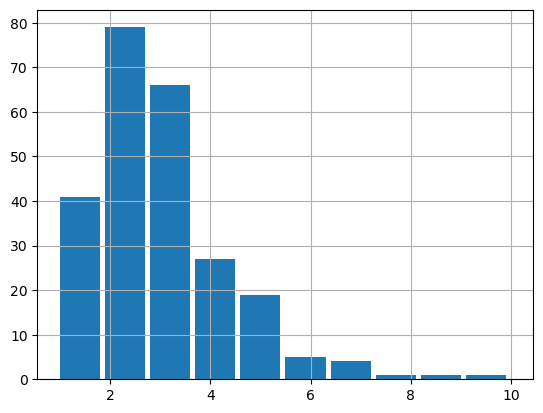

In [81]:
tips.tip.hist(bins = 10, width = 0.8)

In [83]:
tips['tipx'] = pd.cut(tips.tip,
                      bins = 3,
                      labels = ['低','中','高'])

In [84]:
tips

,total_bill,tip,tips_percent,sex,smoker,day,time,size,tipx
0,16.99,1.01,0.059447,Female,No,Sun,Dinner,2,低
1,10.34,1.66,0.160542,Male,No,Sun,Dinner,3,低
2,21.01,3.50,0.166587,Male,No,Sun,Dinner,3,低
3,23.68,3.31,0.139780,Male,No,Sun,Dinner,2,低
4,24.59,3.61,0.146808,Female,No,Sun,Dinner,4,低
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0.203927,Male,No,Sat,Dinner,3,中
240,27.18,2.00,0.073584,Female,Yes,Sat,Dinner,2,低
241,22.67,2.00,0.088222,Male,Yes,Sat,Dinner,2,低
242,17.82,1.75,0.098204,Male,No,Sat,Dinner,2,低


In [85]:
tips.tipx.value_counts()

tipx
低    203
中     38
高      3
Name: count, dtype: int64

# CrossTab

In [87]:
tips.groupby(['sex', 'tipx']).time.count()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17684\3594485364.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['sex', 'tipx']).time.count()


sex     tipx
Female  低        74
        中        13
        高         0
Male    低       129
        中        25
        高         3
Name: time, dtype: int64

In [88]:
tips.groupby(['sex', 'tipx']).time.count().unstack()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17684\3484483228.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['sex', 'tipx']).time.count().unstack()


tipx,低,中,高
sex,,,
Female,74,13,0
Male,129,25,3


In [90]:
tips.pivot_table(index = 'smoker', columns = 'tipx', values = 'day', aggfunc = 'count')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17684\3618843043.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(index = 'smoker', columns = 'tipx', values = 'day', aggfunc = 'count')


tipx,低,中,高
smoker,,,
No,124,25,2
Yes,79,13,1


In [91]:
# ↑数据透视表的行和列都是分类变量，单元格计算的是两组分类变量的交叉频数（交叉表）
# 行百分比/列百分比/总计百分比
# 计算百分比的目的：比较
# 计算百分比的本质：数据标准化

In [92]:
# 男性和女性在低中高三档小费中各自的占比是多少

In [93]:
# 先做出透视表
tips.pivot_table(index = 'sex', columns = 'tipx', values = 'smoker', aggfunc = 'count').fillna(0)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17684\862650381.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(index = 'sex', columns = 'tipx', values = 'smoker', aggfunc = 'count').fillna(0)


tipx,低,中,高
sex,,,
Female,74,13,0
Male,129,25,3


In [95]:
# 行百分比
tips.pivot_table(index = 'sex', 
                 columns = 'tipx', 
                 values = 'smoker', 
                 aggfunc = 'count').fillna(0).apply(lambda x: x/x.sum(), axis = 1)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17684\523047666.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(index = 'sex',


tipx,低,中,高
sex,,,
Female,0.850575,0.149425,0.000000
Male,0.821656,0.159236,0.019108


In [96]:
# 列百分比
tips.pivot_table(index = 'sex', 
                 columns = 'tipx', 
                 values = 'smoker', 
                 aggfunc = 'count').fillna(0).apply(lambda x: x/x.sum(), axis = 0)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17684\2387475952.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(index = 'sex',


tipx,低,中,高
sex,,,
Female,0.364532,0.342105,0.0
Male,0.635468,0.657895,1.0


In [97]:
 # CrossTab
pd.crosstab(index = tips.sex,
           columns = tips.tipx)

tipx,低,中,高
sex,,,
Female,74,13,0
Male,129,25,3


In [98]:
pd.crosstab(index = tips.sex,
           columns = tips.tipx,
           normalize = 'index')

tipx,低,中,高
sex,,,
Female,0.850575,0.149425,0.000000
Male,0.821656,0.159236,0.019108


In [99]:
pd.crosstab(index = tips.sex,
           columns = tips.tipx,
           normalize = 'columns')

tipx,低,中,高
sex,,,
Female,0.364532,0.342105,0.0
Male,0.635468,0.657895,1.0


In [100]:
pd.crosstab(index = tips.sex,
           columns = tips.tipx,
           normalize = 'all')

tipx,低,中,高
sex,,,
Female,0.303279,0.053279,0.000000
Male,0.528689,0.102459,0.012295
